# Configuracón de un robot móvil

Esta práctica consiste en poder graficar el cuerpo del robot dada su configuración. 

Utilizaremos matrices de transformación homogenea

La configuración del robot es
$$
   (x, y, \theta)
$$

Entonces la función de rotación te debe devolver 

$$
R_z(\theta) = \begin{bmatrix} 
cos \theta & - sin \theta & 0 \\
sin \theta & cos \theta  & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

y la función de traslación simplemente te devuelve

$$
T(x,y) = \begin{bmatrix} 
0 & 0 & x \\
0 & 0  & y \\
0 & 0 & 0
\end{bmatrix}
$$

Para generar una transformación usaremos

$$
H(x,y,\theta) = R_z(\theta) + T(x,y)
$$

In [22]:
# importamos paquetes necesarios
import matplotlib.pyplot as plt
import math
from math import sin, cos
import numpy as np
from shapely.geometry import Point, Polygon

import utils

## Uso de numpy

Para la practica es necesario realizar las operaciones con numpy. Asi que va a ser necesario convertir las matrices a arrays de numpy:

R = np.array([lista])

## Clase Robot

Una clase es la abstración de una entidad que contiene atributos y métodos. Para esta práctica crearemos una clase denominada Robot que contendrà como atributos el nùmero de grados de libertad, la configuraciòn actual del robot y el cuerpo con respecto del body frame.

Además la clase Robot contendrá un método llamado $getCurrentBody()$ que devolverà un poligono en el marco de referencia inercial dada la configuraciòn que esè almacenada en el robot. 

Rellena las funciones faltantes.


In [24]:
## Definir la clase Robot

class Robot():
    def __init__(self, max_dof, q_actual, polygon):
        #protected attributes (underscore)
        self._max_dof = 3        # grados de libertad del robot
        self._q_actual = q_actual  # condiciones iniciales
        self._body = polygon
        
        # Retorna la configuración actual
    def getConfig():
        return q
            
    def _getRotation(self, q):
        # Retorna la matriz de rotaciòn de acuerdo a lo visto arriba en formato array
        theta = q[2]
        R = np.array([[cos(theta), -sin(theta), 0],[sin(theta), cos(theta),0 ],[0,0,1]])
        return R
    
    def _getTranslation(self, q):
        # Retorna la matriz de traslacion
        x=q[0]
        y=q[1]
        T = np.array([[0, 0, x],[0, 0, y],[0,0,0]])
        return T
        
    def _getHomogeneousTransform(self, q):
        # Retorna la matriz completa H formada por la suma de R + T
        # Retorna la matriz completa formada por la suma
        H = self._getRotation(q) + self._getTranslation(q)
        return H
    
    
    
    def getCurrentBody(self):
        # Retorna el cuerpo del robot de acuerdo a su configuraciòn actual
        
        # configuraciòn actual
        q = self._q_actual
        
        #obtener la matriz de transformación homogenea
        H = self._getHomogeneousTransform(q)
        #print(H)
        
        #nuevos puntos
        new_points=[]
        
        # para cada punto multiplicarlo por H
        xs, ys = self._body.exterior.coords.xy
        # dado que los vectores deben estar en formato homogeneo les agrearemos un uno
        puntos = [[x,y,1] for x, y in zip(xs, ys)]
        
        puntos = np.array(puntos[:-1])
        #print(puntos)
        
        for elemento in puntos:
            # p' = H . p
            elemento = np.reshape(elemento, (3,1))
            #print(elemento)
            punto_rotado = np.dot(H, elemento)
            #print(punto_rotado)
            
            # solo guardamos las dos primeras coordenadas y desechamos el 1
            new_points.append((punto_rotado[0][0], punto_rotado[1][0]))
        
        #print(new_points)
        # Se genera un nuevo poligono dados los puntos transformados
        new_body = Polygon(new_points)
        return new_body

## Experimento

Ahora probaremos la clase que acabamos de crear

Este es el cuerpo del robot con respecto al body frame. POLYGON ((1 0, 0 2, -1 0, 1 0))


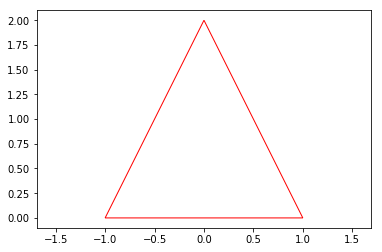

In [25]:
#TODO: Crea un polígono que represente al robot

#cuerpo = None

p1 = (1, 0)
p2 = (0, 2)
p3 = (-1, 0)

# Crear un poligono  partir de una lista de puntos(tuplas de dos elementos)
cuerpo = Polygon([p1,p2,p3]) 

print("Este es el cuerpo del robot con respecto al body frame.", cuerpo)

# la funciòn plotPolygons recibe una lista de poligonos
utils.plotPolygons([cuerpo])

In [26]:
# Crea un objeto de la clase Robot donde establezcas una configuración

# establece el número de grados de libertad
#config_dim = None
config_dim = 3
# configuracion
#config = None
config = [5,5, math.radians(90)]
# crea el objeto
speedy = Robot(config_dim, config, cuerpo)

In [27]:
# obtener el poligono
poli_en_posicion = speedy.getCurrentBody()

print("El cuerpo del robot dada su configuación es:", poli_en_posicion)

El cuerpo del robot dada su configuación es: POLYGON ((5 6, 3 5, 5 4, 5 6))


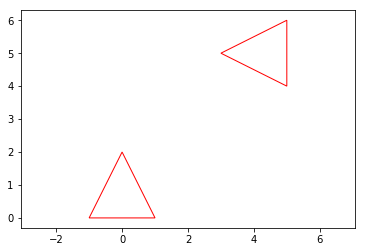

In [28]:
# Desplegar el poligono rotado

# la funciòn plotPolygons recibe una lista de poligonos
utils.plotPolygons([cuerpo, poli_en_posicion])